In [1]:
import hitdifferentparts
import IPython.display as ipd
import numpy as np
sr = 44100
dur = 2**17

## (x,y)->sounds

drum info: 

$\alpha = 1$

$l = l_2 = \pi$

$\omega_1 = 200Hz$

$\tau_1 = 0.2$

p = 0.3

D = 0

$m_1 = m_2 = 5$


In [2]:
y1 = hitdifferentparts.hitdiffparts(0.5,0.5)
ipd.Audio(y1,rate=sr)

--- 2.6756937503814697 seconds ---


## Sample from 1/8 th of a drum surface

In [3]:
x = np.linspace(0,1,20)
y = np.linspace(0,1,20)

In [4]:
import matplotlib.pyplot as plt

In [5]:
x_sel = []
y_sel = []
for i in x:
    for j in y:
        if i < 1/2 and j < 1/2:
            if i <= j:
                if i!=0 and j!=0:
                    x_sel.append(i)
                    y_sel.append(j)

(0, 1)

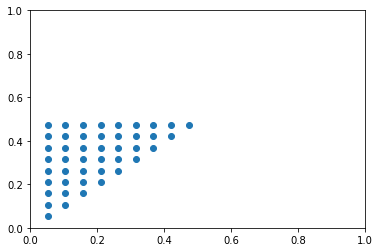

In [6]:
plt.scatter(x_sel,y_sel)
plt.xlim([0,1])
plt.ylim([0,1])

## interpolate sounds from two adjacent points (0.5,0.5) and (0.4,0.5)

In [3]:
y_1 = hitdifferentparts.hitdiffparts(0.5,0.5)
y_2 = hitdifferentparts.hitdiffparts(0.4,0.5)

--- 3.044110059738159 seconds ---
--- 2.565945863723755 seconds ---


In [74]:
ipd.Audio(y_1,rate=sr)

In [75]:
ipd.Audio(y_2,rate=sr)

In [72]:
print(len(y_1),len(y_2),2**16)

65536 65536 65536


In [8]:
import autograd
import torch
from kymatio import Scattering1D

In [6]:
J = 16
Sy1 = autograd.getsc(torch.Tensor(y_1),J)
Sy2 = autograd.getsc(torch.Tensor(y_2),J)


In [9]:
Sy_interpolated = (Sy1+Sy2)/2
y_interpolated = autograd.regress_signal(Sy_interpolated,16,0.1,100)

tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3410e-05,
        -2.4174e-05,  5.3013e-05])
tensor(4.6966, grad_fn=<NormBackward0>)
tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3410e-05,
        -2.4174e-05,  5.3013e-05])
tensor(4.6965, grad_fn=<NormBackward0>)
tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3410e-05,
        -2.4174e-05,  5.3013e-05])
tensor(4.6965, grad_fn=<NormBackward0>)
tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3410e-05,
        -2.4174e-05,  5.3013e-05])
tensor(4.6965, grad_fn=<NormBackward0>)
tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3410e-05,
        -2.4174e-05,  5.3013e-05])
tensor(4.6964, grad_fn=<NormBackward0>)
tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3410e-05,
        -2.4174e-05,  5.3013e-05])
tensor(4.6964, grad_fn=<NormBackward0>)
tensor([-3.3810e-05,  1.1177e-05,  1.8263e-04,  ...,  1.3411e-05,
        -2.4174e-05,  5.3014e-05])
tensor(4.6963, grad_fn=<NormBackward0>)
tensor([-3.38

tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3020e-05])
tensor(4.6941, grad_fn=<NormBackward0>)
tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3021e-05])
tensor(4.6941, grad_fn=<NormBackward0>)
tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3021e-05])
tensor(4.6940, grad_fn=<NormBackward0>)
tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3021e-05])
tensor(4.6940, grad_fn=<NormBackward0>)
tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3021e-05])
tensor(4.6940, grad_fn=<NormBackward0>)
tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3021e-05])
tensor(4.6939, grad_fn=<NormBackward0>)
tensor([-3.3806e-05,  1.1174e-05,  1.8262e-04,  ...,  1.3414e-05,
        -2.4173e-05,  5.3021e-05])
tensor(4.6939, grad_fn=<NormBackward0>)
tensor([-3.38

In [111]:
import torch
from kymatio import Scattering1D
from torch.autograd import backward
import matplotlib.pyplot as plt

def regress_signal(s_c, j, learning_rate=100, n_iterations=100):
	"""
	this function finds time-domain signal from scattering transform
	input: scattering tranform tensor, length of the signal(implicitly), learning rate and number of iterations
	output: time-domain signal represented in a tensor
	"""

	N = 2**j
	scattering = Scattering1D(J = 4,shape=(N,))

	#random guess
	x = torch.randn((N,),requires_grad=True)
	Sx = scattering(x)
	#target
	Sy = s_c
	history = []
	#x.requires_grad = True
	#n_iterations = 100
	#iterate to regress random guess to be close to target
	for it_id in range(100):
	    # Backpropagation
	    backward(torch.norm(Sx - Sy))
	    delta_x = x.grad
	    #print(x.grad)

	    # Gradient descent
	    with torch.no_grad():
	        x = x - delta_x * learning_rate
	    x.requires_grad = True

	    # New forward propagation
	    Sx = scattering(x)
	    # Measure the new loss
	    history.append(float(torch.norm(Sx-Sy)))
	    #print(torch.norm(Sx - Sy))
        
	#plt.plot(history)
	#plt.show()
	
	return x,history

verify if the regression actually works - no it doesn't

In [113]:
y_interpolated,history = regress_signal(Sy_interpolated,16,200,300)
plt.plot(history)

RuntimeError: The size of tensor a (4096) must match the size of tensor b (64) at non-singleton dimension 1

In [107]:
print(history[-1])
ipd.Audio(list(y_interpolated),rate=sr)

0.09880844503641129


In [112]:
Sy2.shape

torch.Size([64, 64])

In [78]:
distance = np.linalg.norm(Sy1-Sy2)
Sy_mid = Sy1-distance

In [81]:
print(np.linalg.norm(Sy_mid-Sy_interpolated))

0.58822775


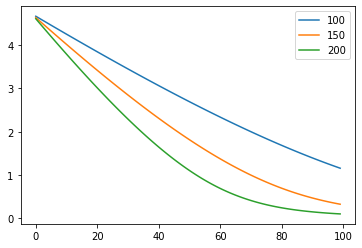

In [53]:
plt.figure(2)
legend = []
for rate in [100,150,200]:
    y_interpolated,history = regress_signal(Sy_interpolated,16,rate,100)
    legend.append(str(rate))
    plt.plot(history)
plt.legend(legend)

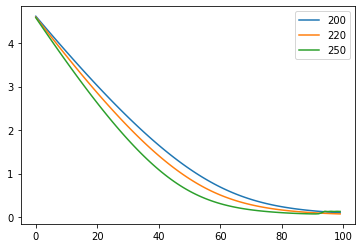

In [63]:
plt.figure(2)
legend = []
for rate in [200,220,250]:
    y_interpolated,history = regress_signal(Sy_interpolated,16,rate,100)
    legend.append(str(rate))
    plt.plot(history)
plt.legend(legend)

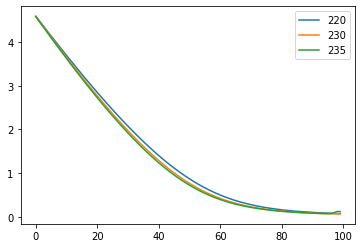

In [66]:
plt.figure(2)
legend = []
for rate in [220,230,235]:
    y_interpolated,history = regress_signal(Sy_interpolated,16,rate,100)
    legend.append(str(rate))
    plt.plot(history)
plt.legend(legend)

decided on learning rate being 230

In [68]:
y_interpolated,history = regress_signal(Sy_interpolated,16,230,300)

In [69]:
history[-1]

0.0758727416396141

In [87]:
y_interpolated2,history = regress_signal(Sy_mid,16,800,100)
history[-1]

0.602475106716156

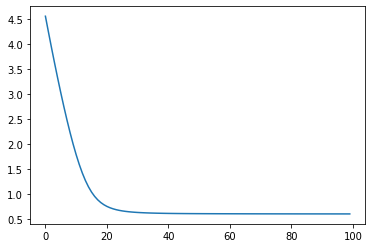

In [88]:
plt.plot(history)

In [100]:
ipd.Audio(list(y_interpolated2),rate=sr)

In [70]:
y_inter = np.array(list(y_interpolated))

In [71]:
print(y_inter,len(y_inter))
ipd.Audio(y_inter,rate=sr)

[tensor(-0.1541, grad_fn=<SelectBackward>)
 tensor(-0.1366, grad_fn=<SelectBackward>)
 tensor(-0.1363, grad_fn=<SelectBackward>) ...
 tensor(-0.1512, grad_fn=<SelectBackward>)
 tensor(-0.1429, grad_fn=<SelectBackward>)
 tensor(-0.1450, grad_fn=<SelectBackward>)] 65536


ground truth sound at (0.45,0.5)

In [91]:
y_gt = hitdifferentparts.hitdiffparts(0.45,0.5)
ipd.Audio(y_gt,rate=sr)

--- 1.8833122253417969 seconds ---


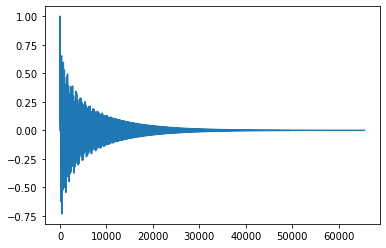

In [97]:
plt.plot(y_gt)

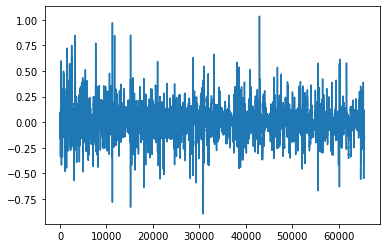

In [96]:
plt.plot(y_inter)

## Kymatio

In [3]:
import torch
from kymatio import Scattering1D

In [4]:
# Set the parameters of the scattering transform.
J = 6
T = 2**13
Q = 8

# Generate a sample signal.
x = torch.randn(1, 1, T)

# Define a Scattering1D object.
S = Scattering1D(J, T, Q)

# Calculate the scattering transform.
Sx = S.forward(x)

In [6]:
print(Sx,Sx.shape)

tensor([[[[-6.2078e-02, -5.3912e-02, -3.8472e-02,  ...,  1.0951e-01,
            1.2154e-01,  1.1615e-01],
          [ 1.6576e-01,  1.6780e-01,  1.7115e-01,  ...,  1.6913e-01,
            1.6445e-01,  1.6491e-01],
          [ 1.3826e-01,  1.3922e-01,  1.4269e-01,  ...,  1.4335e-01,
            1.2972e-01,  1.2100e-01],
          ...,
          [ 1.7812e-05,  1.9328e-05,  2.4117e-05,  ...,  1.7512e-05,
            1.7597e-05,  1.6978e-05],
          [ 2.7673e-05,  2.8760e-05,  3.0415e-05,  ...,  2.0723e-05,
            2.1456e-05,  2.2471e-05],
          [ 6.2213e-06,  7.0801e-06,  9.3679e-06,  ...,  3.5884e-05,
            3.4487e-05,  3.2453e-05]]]]) torch.Size([1, 1, 126, 128])


## Kymatio

In [8]:
import torch
from kymatio import Scattering1D
from kymatio.scattering1d.filter_bank import scattering_filter_factory

In [20]:
T = len(y1)
np.log2(T)

16.428491035332247

example filterbank

In [23]:
# Set the parameters of the scattering transform.
J = 6 #largest filter would cover 2**6 in time (window size?)
T = 2**13 #signal length
#T = len(y1)
Q = 8 #usually between 4 and 16, filterbank divides the octave in Q parts


phi_f, psi1_f, psi2_f, _ = scattering_filter_factory(np.log2(T), J, Q)

Text(0.5, 1.0, 'First-order filters (Q = 8)')

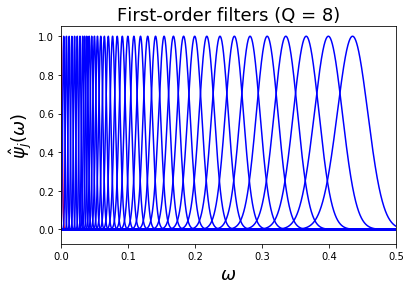

In [24]:
plt.figure()
plt.plot(np.arange(T)/T, phi_f[0], 'r')

for psi_f in psi1_f:
    plt.plot(np.arange(T)/T, psi_f[0], 'b')

plt.xlim(0, 0.5)

plt.xlabel(r'$\omega$', fontsize=18)
plt.ylabel(r'$\hat\psi_j(\omega)$', fontsize=18)
plt.title('First-order filters (Q = {})'.format(Q), fontsize=18)

convert generated signal to torch tensor before carrying out scattering trasform

In [29]:
# Generate a sample signal.
x = torch.from_numpy(y1).float()
x /= x.abs().max()
x = x.view(1, -1)
# Set scattering transform parameters
T = x.shape[-1]
J = 6
Q = 16
# Define a Scattering1D object.
S = Scattering1D(J, T, Q)

# Calculate the scattering transform.
Sx = S.forward(x)

In [36]:
meta = Scattering1D.compute_meta_scattering(J, Q)
order0 = (meta['order'] == 0)
order1 = (meta['order'] == 1)
order2 = (meta['order'] == 2)
print(order0,order1,order2)

tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]) tensor([False

Text(0.5, 1.0, 'Original signal')

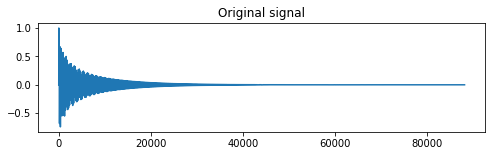

In [33]:
plt.figure(figsize=(8, 2))
plt.plot(x[0,:].numpy())
plt.title('Original signal')

Text(0.5, 1.0, 'Scattering Order 0')

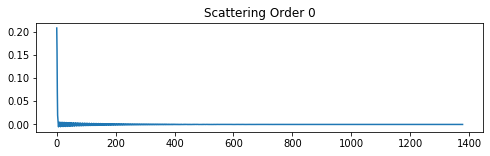

In [37]:
plt.figure(figsize=(8, 2))
plt.plot(Sx[0,order0,:].numpy().ravel())
plt.title('Scattering Order 0')

Text(0.5, 1.0, 'Scattering Order 1')

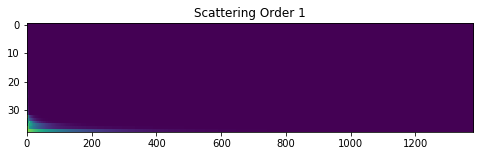

In [38]:
plt.figure(figsize=(8, 2))
plt.imshow(Sx[0,order1,:].numpy(), aspect='auto')
plt.title('Scattering Order 1')

Text(0.5, 1.0, 'Scattering Order 2')

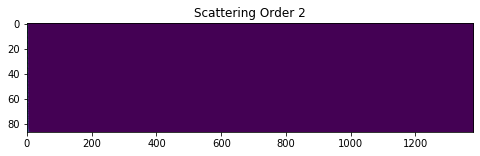

In [39]:
plt.figure(figsize=(8, 2))
plt.imshow(Sx[0,order2,:].numpy(), aspect='auto')
plt.title('Scattering Order 2')

## reconstruct signals from scattering coefficients